Water Quality Classification

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [9]:
data = pd.read_csv('water_potability.csv')
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [10]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [14]:
data['ph_mean']=data['ph'].fillna(data['ph'].mean())
data['ph_mean'].describe()

count    3276.000000
mean        7.080795
std         1.469956
min         0.000000
25%         6.277673
50%         7.080795
75%         7.870050
max        14.000000
Name: ph_mean, dtype: float64

In [15]:
data['ph_mean'].isnull().sum()

0

In [16]:
data['ph_median']=data['ph'].fillna(data['ph'].median())
data['ph_median'].describe()

count    3276.000000
mean        7.074194
std         1.470040
min         0.000000
25%         6.277673
50%         7.036752
75%         7.870050
max        14.000000
Name: ph_median, dtype: float64

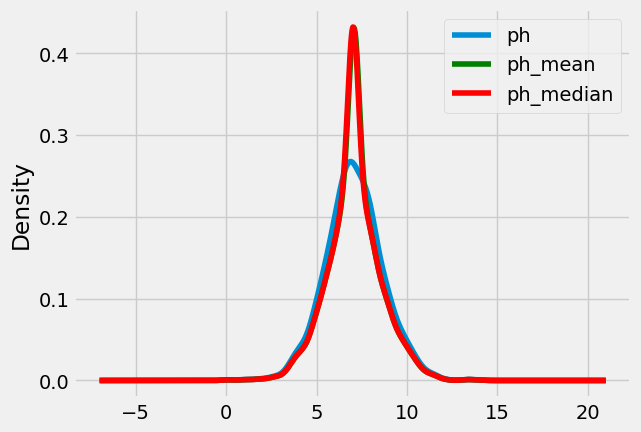

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['ph'].plot(kind='kde', ax=ax)
data['ph_mean'].plot(kind='kde', ax=ax, color='green')
data['ph_median'].plot(kind='kde', ax=ax, color='red')
plt.legend(['Original Data', 'Mean', 'Median'])
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

<Axes: >

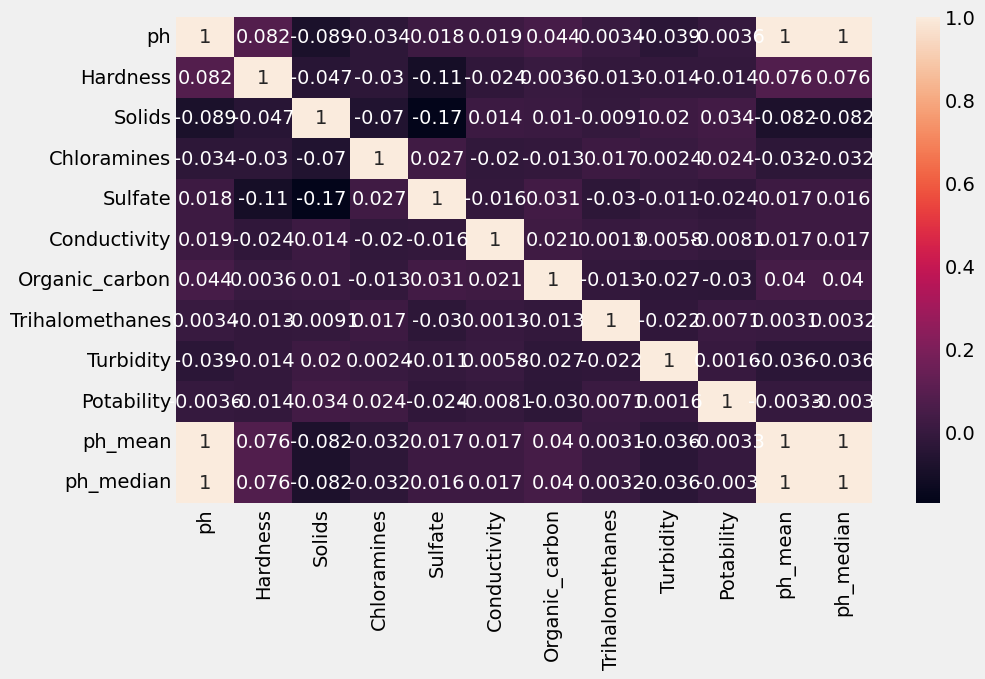

In [23]:
plt.figure(figsize=(10,6))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot=True)

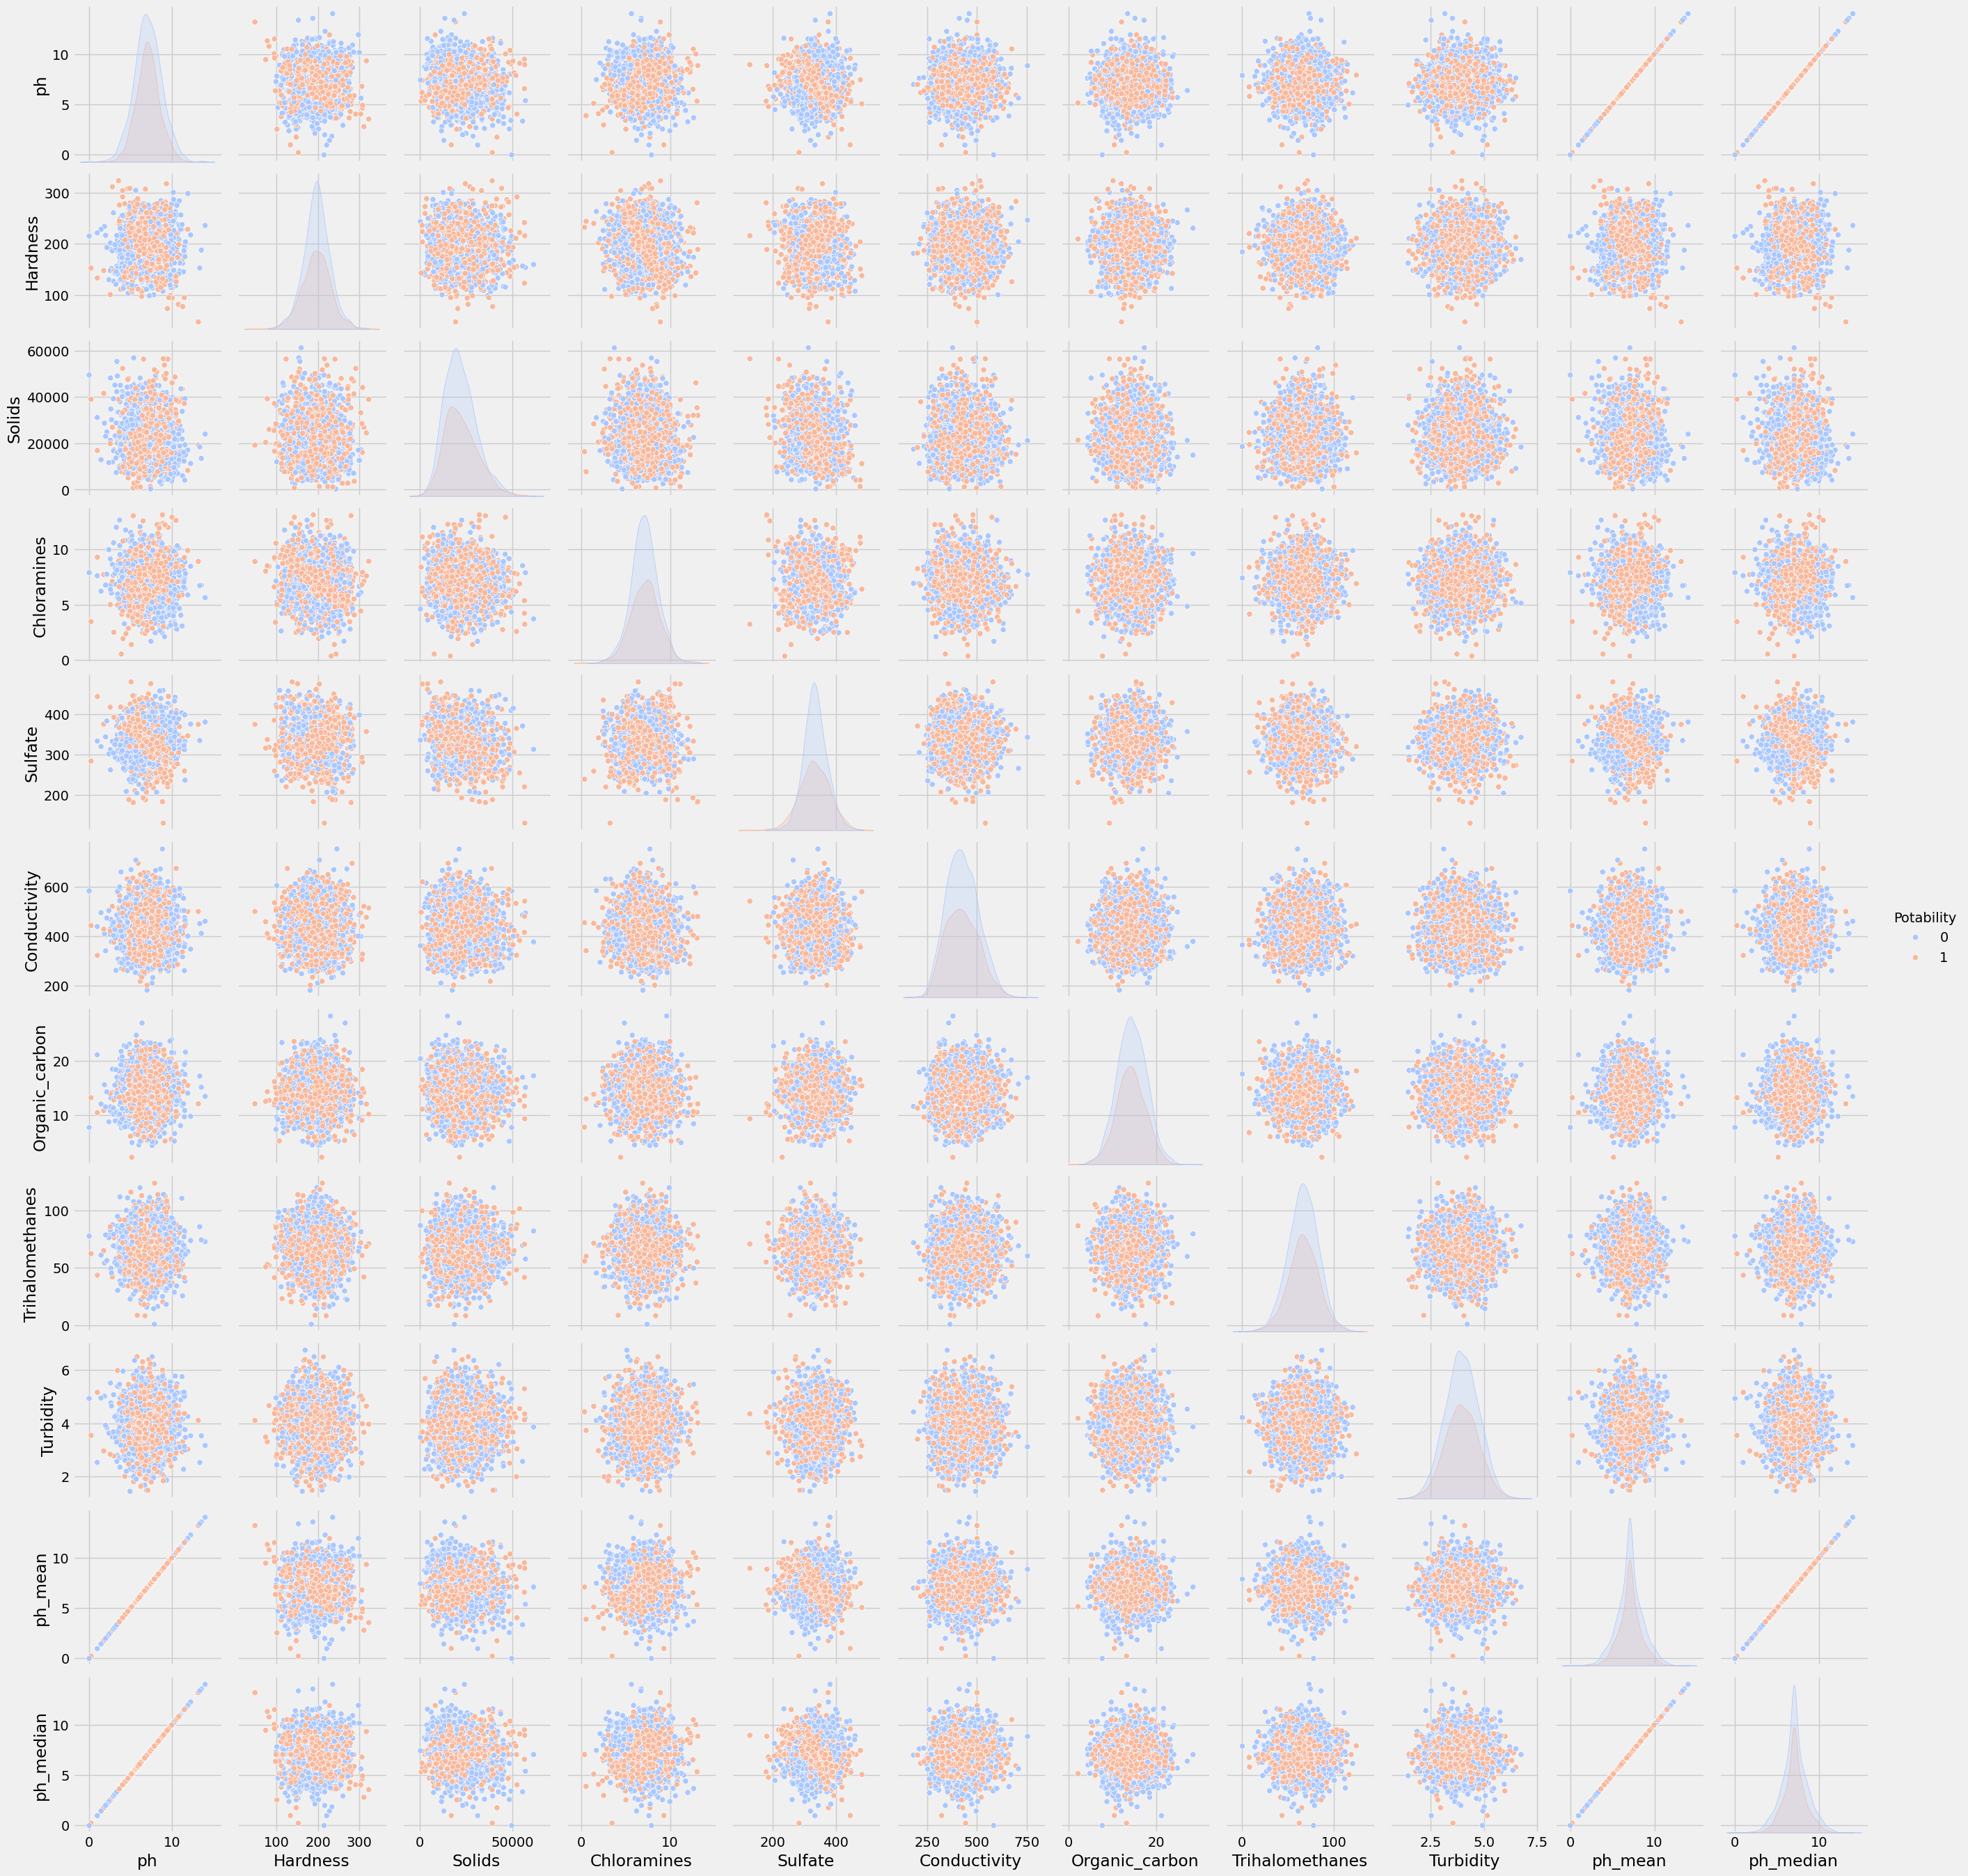

In [26]:
sns.pairplot(data , hue='Potability', palette='coolwarm')

In [27]:
data["Conductivity"].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

Text(0.5, 1.0, 'Distribution of Conductivity')

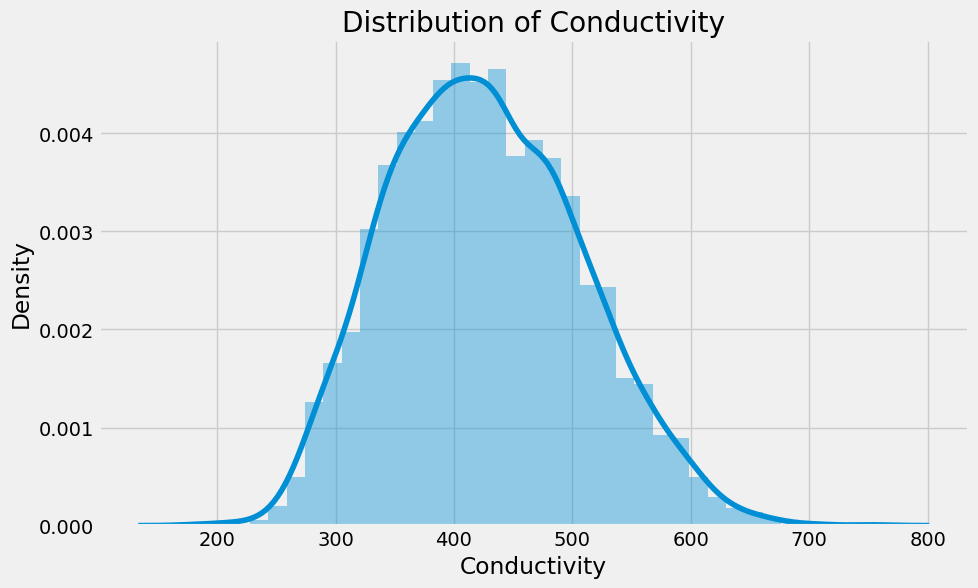

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(data['Conductivity'])
plt.title('Distribution of Conductivity')

In [30]:
data["Turbidity"].describe()

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

Text(0.5, 1.0, 'Distribution of Turbidity')

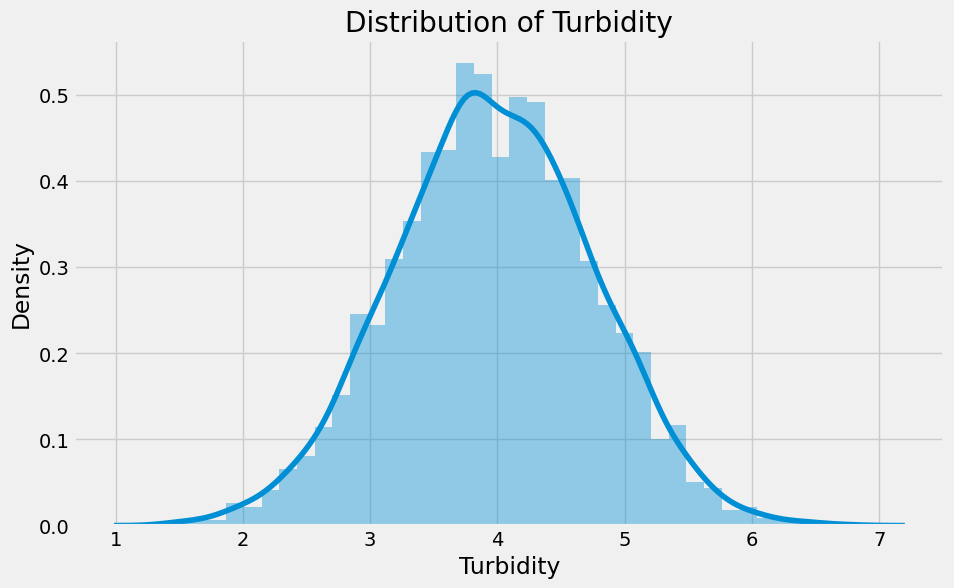

In [31]:
plt.figure(figsize=(10,6))
sns.distplot(data['Turbidity'])
plt.title('Distribution of Turbidity')

<Axes: ylabel='count'>

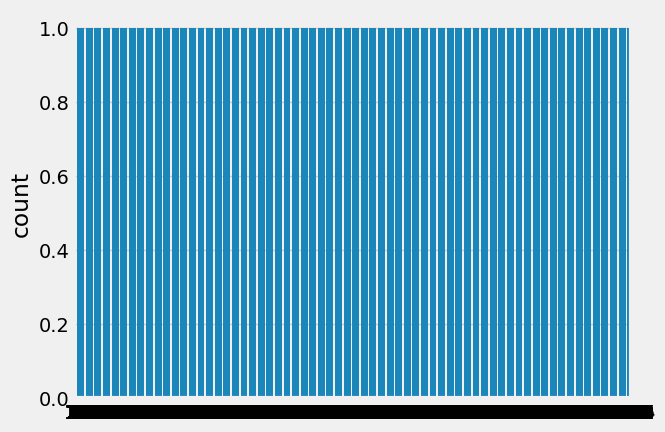

In [32]:
sns.countplot(data['Potability'])

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X=data.drop(['Potability'],axis=1)
y=data['Potability']

scaler = StandardScaler()
x=scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(2784, 11) labels(2784,) 
testing data shape:-(492, 11) labels(492,) 


In [45]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='mean')
X = data.drop(['Potability'], axis=1)
y = data['Potability']

X = imputer.fit_transform(X)

scaler = StandardScaler()
x = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=42)

log = LogisticRegression(random_state=0).fit(x_train, y_train)
log.score(x_train, y_train)
log.score(x_test, y_test)

0.6219512195121951

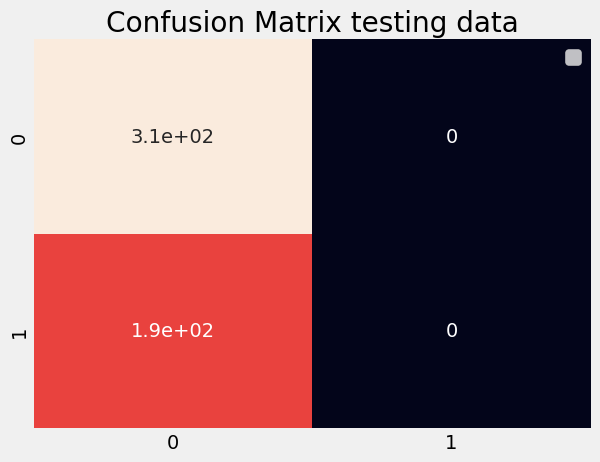

In [48]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
pred1=log.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
predicted= knn.predict(x_test)

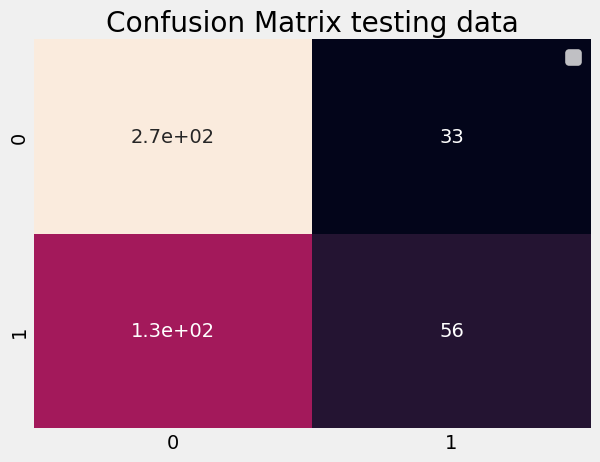

In [53]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
pred1=knn.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

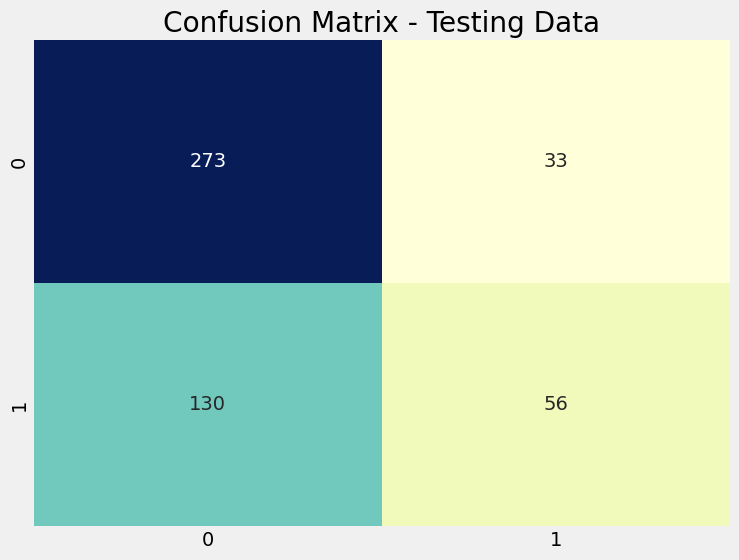

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict using your KNN model
pred1 = knn.predict(np.array(x_test))
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix - Testing Data")
conf_matrix = confusion_matrix(y_test, pred1)
sns.heatmap(conf_matrix, annot=True, cbar=False, cmap='YlGnBu', fmt='d')
plt.show()
